# Import and exploration of data

Author: Yanik Sterchi
Date: 06.01.2021

In this Jupyter notebook you will get started on data analysis with Python. The first step is to import your data into Python. In a second step, you have to get an overview over the data: What columns are there (in SPSS we would call them "variables") ? And how are the values of these columns distributed?

## 1. Loading of required libraries and setting of working directory
For each Jupyter Notebook we have to import the libraries we need and set the working directory again (they run independently of each other). You will have to redirect your working directory to the path where you want to save the data that you will download and explore. 

In [121]:
    import pandas as pd # Pandas for data frames
    import matplotlib.pyplot as plt # Pyplot for graphs

    import os
import matplotlib.pyplot as plt


In [122]:
# DIY: Now you have to set the working directory of this notebook to the folder where you want to store the files of this course
os.chdir(r"C:/Data_Science_Python")

## 2. Import of data files

With Python, you can import data from various sources: You can e.g. scrape a webpage, connect to a data base or connect to Twitter's API. The maybe most generic way to import data is in form of comma-separated values (csv) files: Basically text files, in which the values of different columns are separated by commas or some other character (the so called *separator*).

To analyze the data from the Titanic disaster, we want to import two different csv files: titanic.csv and family.csv. First you have to download these two files from Moodle to the working directory you defined above. 

Each of the two files contains information about the passengers of the titanic. The tables below show a short description of the column in the two files. 

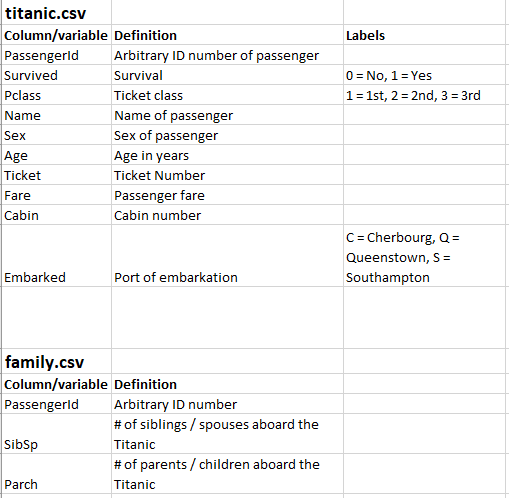

#### Importing csv files with Pandas
For importing the data, you can use the Pandas function `pd.read_csv`. 
First, make a new code cell and run the code `??pd.read_csv` to see the documentation of the function. As you will see, there are many *parameters* or *arguments* of the function (remember: arguments are basically inputs settings you can choose). Most of these arguments have a default value (basically the default setting; e.g. `sep = ','` indicates that the default separator is a comma) and you only have to provide an argument if you want to change the default setting or if you want to remind yourself of the setting you chose (in other words: the `sep=","` in the examples below is not necessary for the code to work, but makes it obvious that csv files use a comma as the separator).  

However, some of the arguments you must provide: The function does not know by default which csv-file you want to open, so you have to define this file as the first parameter of the function. All the parameters are described in the help file (you can also google the function to find the help file on the pandas homepage, if that is more convenient to you). 
The code cell below imports "titanic.csv" and assigns it to the variable `titanic_raw`. when you run it. Then, adapt the code to import "family.csv" and assign it to the variable `family_raw`. Don't bother with all the additional arguments, unless you are somehow interested in them. 

In [123]:
??pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [124]:
titanic_raw = pd.read_csv("data_exploration/titanic.csv", sep=",", decimal=".")

In [125]:
# DIY: Import the file "family.csv" and assign it to the variable "family_raw"
family_raw = pd.read_csv("data_exploration/family.csv", sep=",", decimal=".")

## 3. Exploration of columns
If you ran the `pd.read_csv()` functions above and no error appeared, you have probably already imported them successfully. That was quite easy, right? Now, you should have a look at what exactly you have imported. In summary, we will look at the following steps: 

1. Preview of data files
2. Inspect data type of the columns (see table below for a short overview)
3. Check whether any column includes missing values and if so, how many
4. Look at the distribution of each column
    1. For categorical columns (i.e. columns with pandas data type "object"): Frequency tables and e.g. bar charts
    2. For numerical columns (i.e. columns with pandas data type int64 or float64): Summary statistics and histograms (or box plots or violin plots)

### Data types of python and pandas
Pandas uses slightly different data types than the data types of basic Python, which you saw in the Notebook "Intro_Jupyter&Python". You can ignore the column for NumPy. 

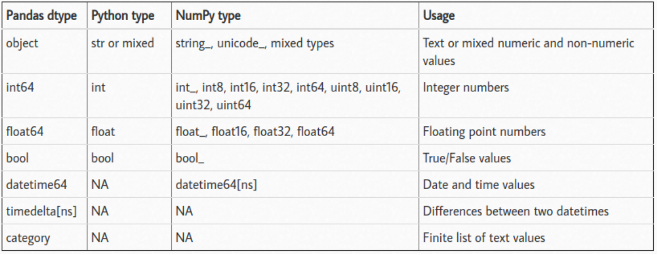

### 3.1: Preview of data files
You have already learned that you can use the function `display()` to make Jupyter show you a data frame. If the data frame has many rows, Jupyter will not display the complete data frame so you don't have to scroll through thousands of lines, but instead shows you - depending on the version you have installed - the first 5 or 30 and the last 5 or 30 lines of the data frame. If you are shown too many rows, you can change the number of displayed rows to e.g. 10 (the first 5 and last 5 rows) with the function `pd.set_option('display.max_rows', 10)`. 

Execute the next code cell and have a look at the data frame "titanic_raw". 

In [126]:
# Preview of data file "titanic_raw"
pd.set_option('display.max_rows', 10)
display(titanic_raw)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


In [127]:
# DIY: Preview the second data file "family_raw"
pd.set_option('display.max_rows', 10)
display(family_raw)

,PassengerId,SibSp,Parch
0,1,1,0
1,2,1,0
2,3,0,0
3,4,1,0
4,5,0,0
...,...,...,...
886,887,0,0
887,888,0,0
888,889,1,2
889,890,0,0


### 3.2: Display the data type for each column/variable of the data files
You can display the data type for each column of a data frame by adding `.dtype` after the name of the data frame and then running the code. Below, we do this with the data frame "titanic_raw". Each code cell displays/prints the last variable that is called. Therefore, for this last variable you can omit the function `display()` or `print()`. You can see this in the example below. 

In [128]:
# 3.2: Display the data type for each column of the data frame "titanic_raw"
titanic_raw.dtypes # a table of the data types is provided by adding ".dtypes" after the data frame
# the last variable in a code cell is automatically displayed and the display-command can be omitted

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [129]:
# DIY: Display the data types for the second data frame "family_raw"
family_raw.dtypes

PassengerId    int64
SibSp          int64
Parch          int64
dtype: object

### 3.3: Count the number of missing values for each of the columns
Below you see how you can count the number of missing values for each column of the data frame "titanic_raw". 

In [130]:
titanic_raw.isna().sum() # Here we add two functions behind each other. The first checks for each cell of the table, ...
# ...whether it is missing, returning True or False. The second function counts the number of True cells for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see in the output above that *Age* is missing for 177 of the passengers, *Cabin* is missing for 687 passengers and *Embarked* is missing for 2 passengers. 

In [131]:
# DIY: Count the number of missing values for each of the columns of the data frame "family_raw"
family_raw.isna().sum()

PassengerId    0
SibSp          0
Parch          0
dtype: int64

### 3.4a: Frequency tables and bar plots for categorical columns
To show frequency tables (e.g. how many men and women were aboard the Titanic) you first have to select a column (remember: you can return a column of a data frame by adding the column name after the data frame's name, separated by a dot) and then add the function `value_counts()`. 

In [132]:
# Lets make a frequency table for the column "Embarked"
print(titanic_raw.Embarked.value_counts()) 

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [133]:
# Comparable to data frames, only the first and last 5 rows of each frequency table are displayed, unless you change that option
print(titanic_raw.Cabin.value_counts())

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


In [134]:
# DIY: Display frequency tables for the columns "Sex", "Pclass" and "Ticket"
print(titanic_raw.Sex.value_counts())
print(titanic_raw.Pclass.value_counts())
print(titanic_raw.Ticket.value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


#### Bar charts of frequencies
You can show the same information as a bar chart instead of a frequency table, by adding `.plot(kind="bar")` after `value_counts()`. 

<Axes: xlabel='Embarked'>

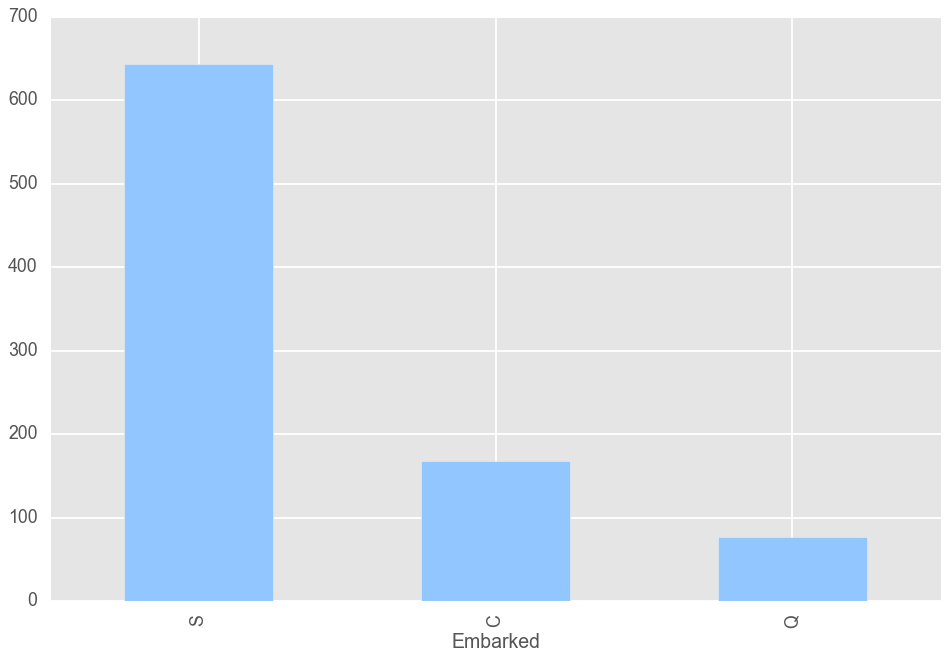

In [135]:
# 3.4a: Frequency tables as figures: Bar charts
titanic_raw.Embarked.value_counts().plot(kind="bar") #just add ".plot(kind='bar')" to the command generating the frequency table

<Axes: xlabel='Survived'>

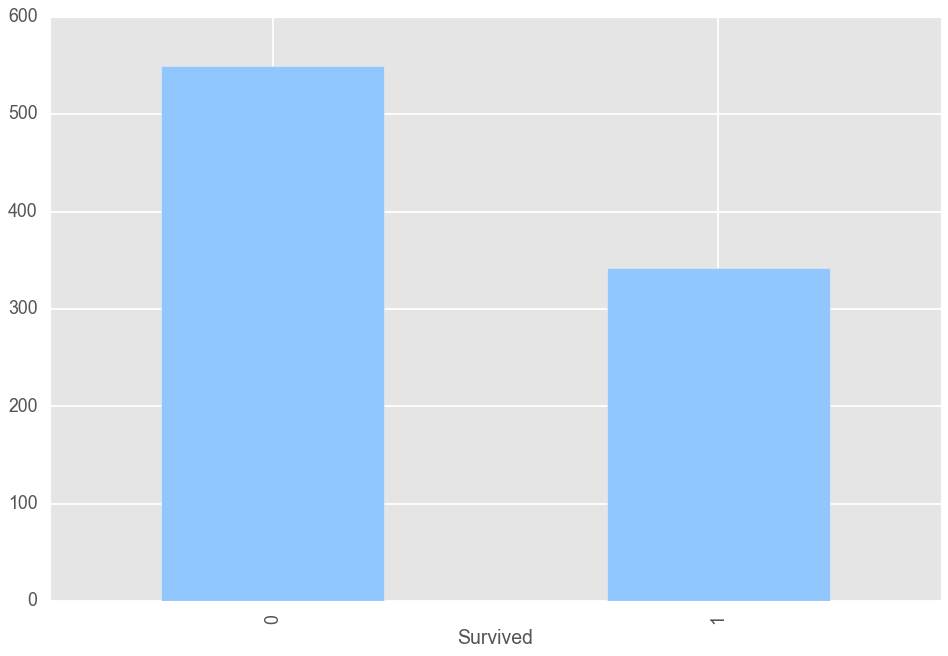

In [136]:
# DIY: Show the frequencies of "Survived" as a bar chart
titanic_raw.Survived.value_counts().plot(kind="bar")

#### Bonus exercise
Show the relative frequencies, i.e. the share of passengers who survived/died. For this, you need to pass the argument `normalize=True` to the function `value_counts()` (inside of the brackets of the function). 

<Axes: xlabel='Survived'>

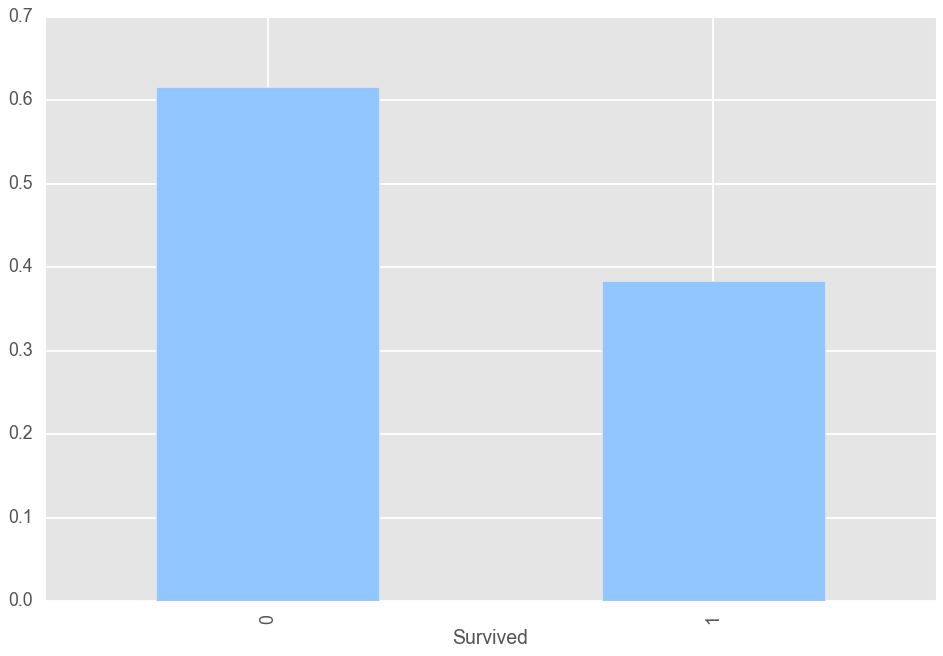

In [137]:
titanic_raw.Survived.value_counts(normalize=True).plot(kind="bar")

### 3.4b: Summary statistics and histograms for numerical columns
The function `describe()` calculates some summary statistics (mean, std, min, percentiles 25, 50 [i.e. the median], 75, max) for each numerical column of the data frame. 

In [138]:
# Summary statistics for the data frame "titanic_raw"
titanic_raw.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [139]:
# DIY: Show the summary statistics for the data frame "family_raw"
family_raw.describe()

,PassengerId,SibSp,Parch
count,891.000000,891.000000,891.000000
mean,446.000000,0.523008,0.381594
std,257.353842,1.102743,0.806057
min,1.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000
50%,446.000000,0.000000,0.000000
75%,668.500000,1.000000,0.000000
max,891.000000,8.000000,6.000000


#### Histograms to show the distribution of numerical columns
Often, to look at a histogram of numerical columns provides a useful addition to the summary statistics. Adding the function `hist()` shows the distribution of all numerical columns of a data frame as a histogram. If there are multiple numerical columns, each histogram will be displayed quite small by default. This is most easily solved by only showing histograms of a few columns at once. 

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>],
       [<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

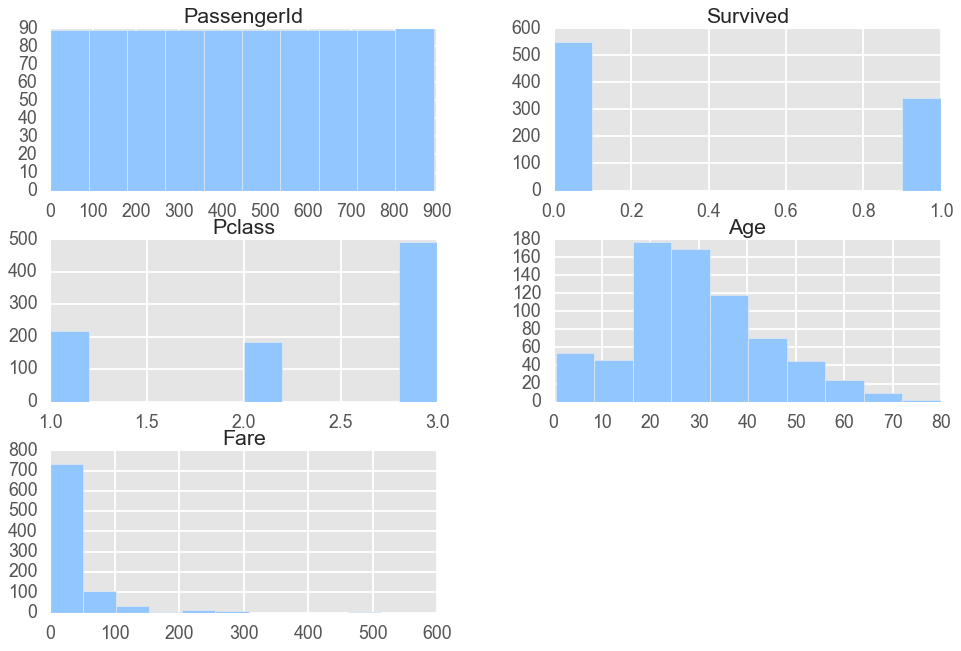

In [140]:
# Displaying histograms of all numerical columns of the data frame "titanic_raw"
titanic_raw.hist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

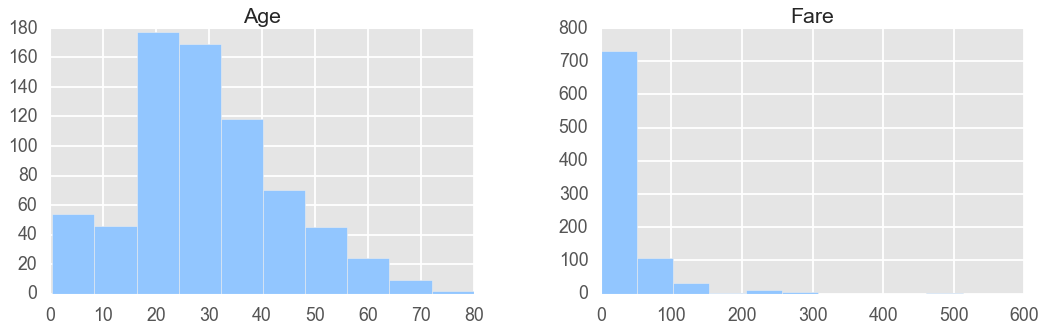

In [141]:
# That looks quite cramped..
# ...and also does not really make sense becaus PassengerId and Pclass are not really metric columns...
# ...therefore, we only select two columns and make the plot a bit wider

titanic_raw[["Age", "Fare"]].hist(figsize=(14, 4))

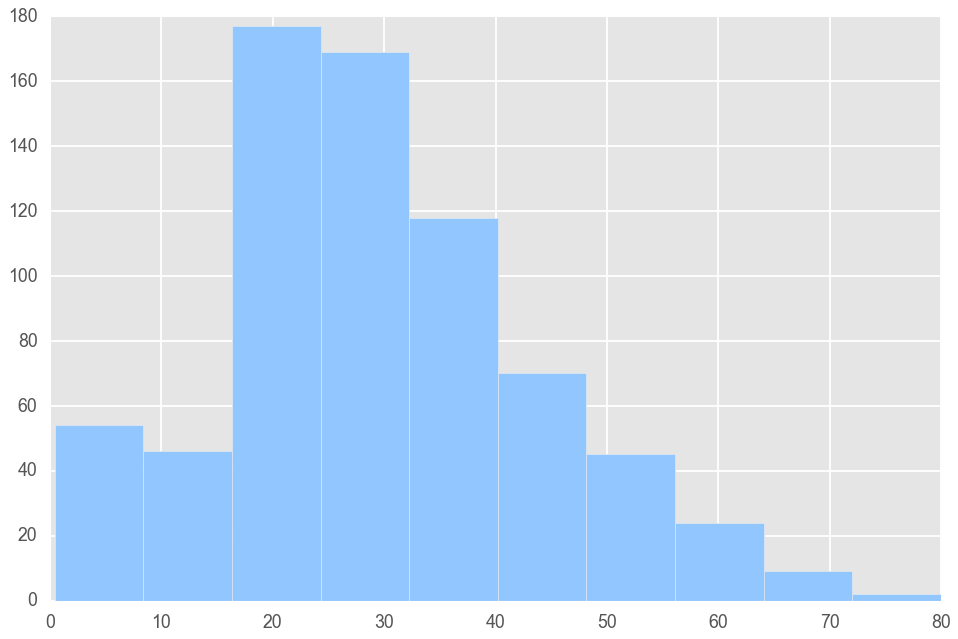

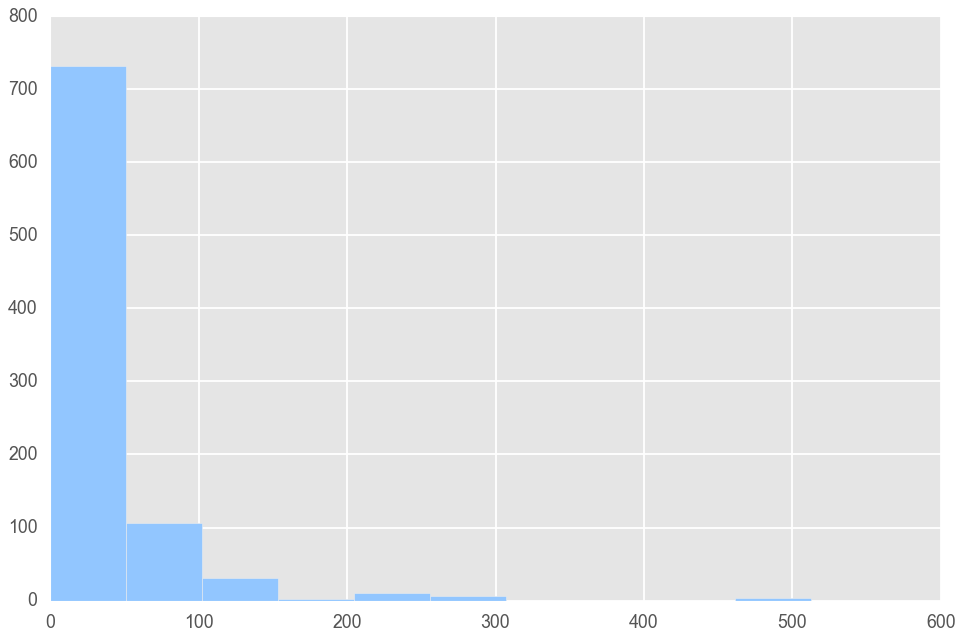

In [142]:
# Or you might just want to show separate histograms of single columns below each other
# In order to show multiple plots in one cell, use the function "plt.show()" similar to the function "display()" for data frames
titanic_raw.Age.hist()
plt.show()
titanic_raw.Fare.hist()
plt.show()


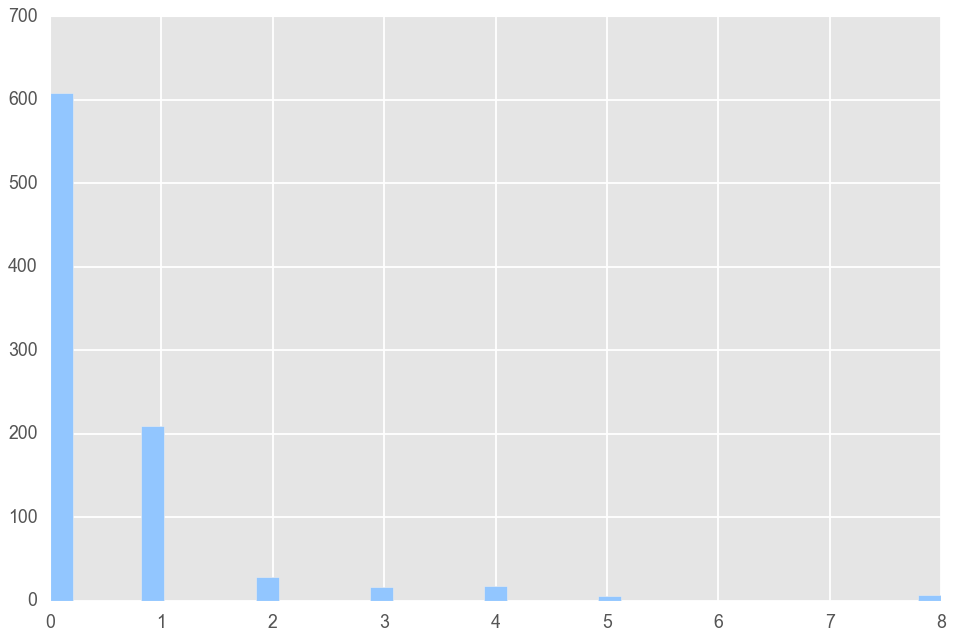

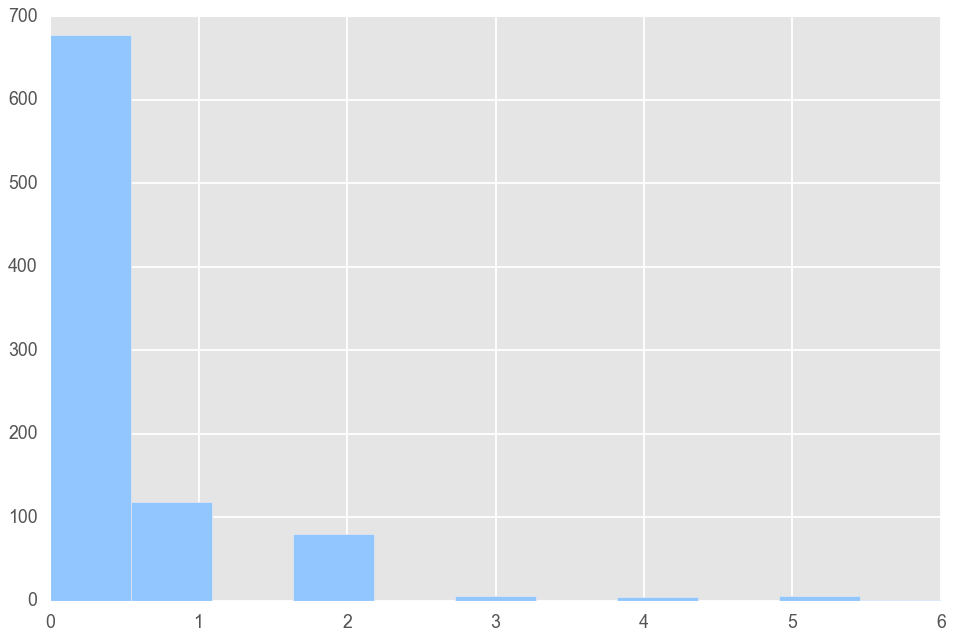

In [143]:
#DIY: Show histograms of the columns SibSp (number of sibglings and Spouses) and Parch (number of parents)...
#...from the data frame "family_raw"
family_raw.SibSp.hist(bins='auto')
plt.show()
family_raw.Parch.hist(bins='auto')
plt.show()

#### Bonus exercise
If you have a close look at the histograms for the columns "Parch" and "SibSp", you might notice that they are not suited well for these columns. Because the number of parents, children, siblings and spouses is always a full number (an *integer*) some bins of the histograms (the "bars" of a histogram are called *bins*) do not make mutch sense, e.g. there is a bin ranging from around 1.2 to 1.8, but by definition there will be no passengers with a number of parents/children between 1.2 and 1.8. Try to use the argument `bins` of the function `hist()` to adjust how the bins are placed. 
You can also make a second graph as an alternative, where you treat the columns like categorical columns and display them as bar charts, as you have done above for categorical columns. You will need to pass the argument `sort = False` to the function `value_counts`, otherwise the numbers on the x-axis will not be in ascending order. 

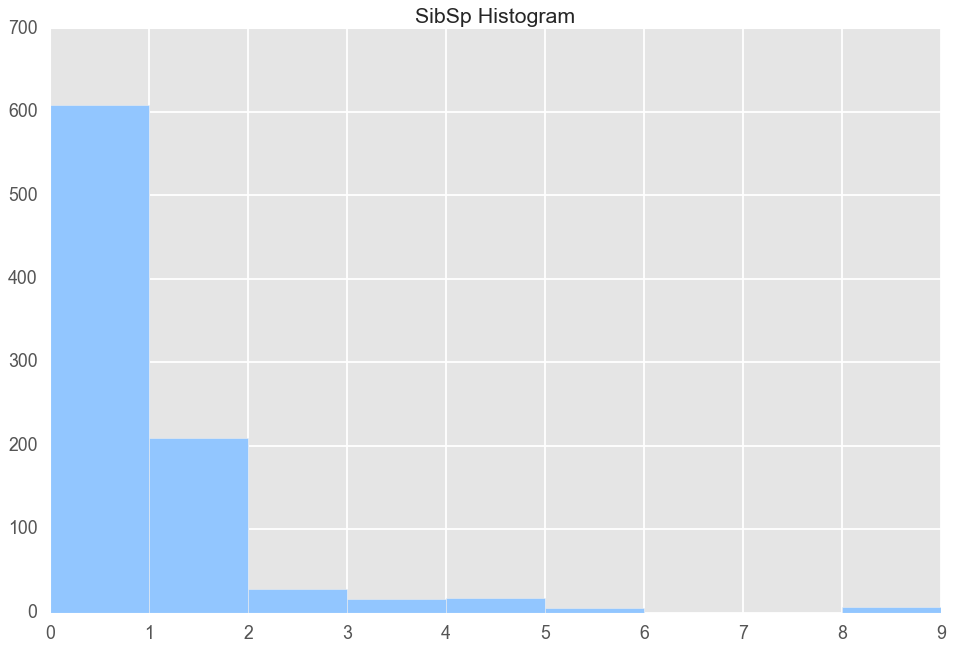

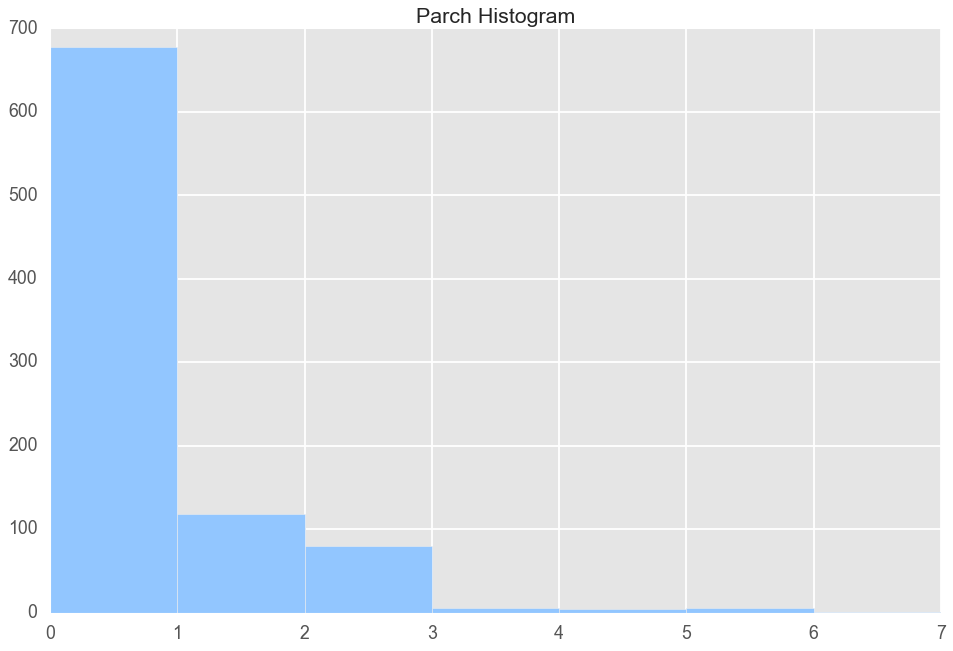

In [144]:
family_raw['SibSp'].hist(bins=range(int(family_raw['SibSp'].min()), int(family_raw['SibSp'].max()) + 2))
plt.title('SibSp Histogram')
plt.show()
family_raw['Parch'].hist(bins=range(int(family_raw['Parch'].min()), int(family_raw['Parch'].max()) + 2))
plt.title('Parch Histogram')
plt.show()

## Congratulations!

Now we have a pretty good overview over the raw data available to us. Below you can find some bonus tasks if you need something to keep you busy. 

## More bonus exercises

#### Bonus Exercise
Make a pie chart showing the frequency of the passenger's sex. For this, you will also need to use the function `value_counts()` to create a frequency table before you can plot the frequencies in form of a pie chart. Use google to find out how to create a pie chart with pandas. 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


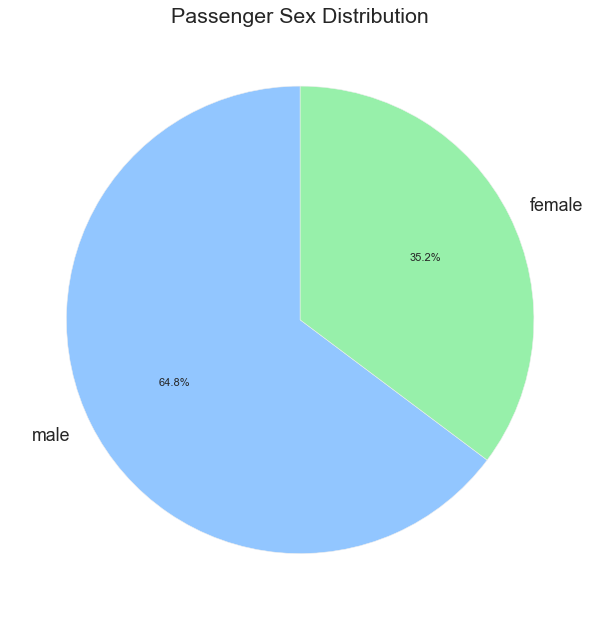

In [145]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')
sex_counts = titanic_raw['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Passenger Sex Distribution')
plt.ylabel('')  # Entfernt die y-Achsenbeschriftung, da sie bei einem Kreisdiagramm nicht benötigt wird
plt.show()


#### Bonus Exercise 
Select all columns of data type "object" from the data frame "titanic_raw" and display frequency tables for these columns using a for-loop. For this, you can first get all column names with the data type "object" with: 
`cols = titanic_raw.columns[titanic_raw.dtypes=="object"]`

Then you can loop over the column names and show the frequency table for each column. 

In [146]:
# Erhalte die Namen aller Spalten vom Typ "object"
object_cols = titanic_raw.columns[titanic_raw.dtypes == "object"]

# Iteriere über die Spaltennamen
for col in object_cols:
    print(f"Häufigkeitstabelle für die Spalte: {col}")
    print(titanic_raw[col].value_counts())
    print("\n")  # Fügt eine Leerzeile für bessere Lesbarkeit hinzu


Häufigkeitstabelle für die Spalte: Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Häufigkeitstabelle für die Spalte: Sex
Sex
male      577
female    314
Name: count, dtype: int64


Häufigkeitstabelle für die Spalte: Ticket
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


Häufigkeitstabelle für die Spalte: Cabin
Cabin
B96 B98        4
G

## Advanced Exercises
Advanced exercises will give you an advanced understanding of Python and its possibilities. They will take more time to complete and no solution will be provided for these exercises. 

### Advanced Exercise 1
Make a function that takes a data frame as an argument and automatically executes all the data exploration steps of above. 

### Advanced Exercise 2
Make an interactive dashboard using seaborn that lets you select one of multiple columns and shows a table and a graph for the selected column. 

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


Datentypen:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Fehlende Werte pro Spalte:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




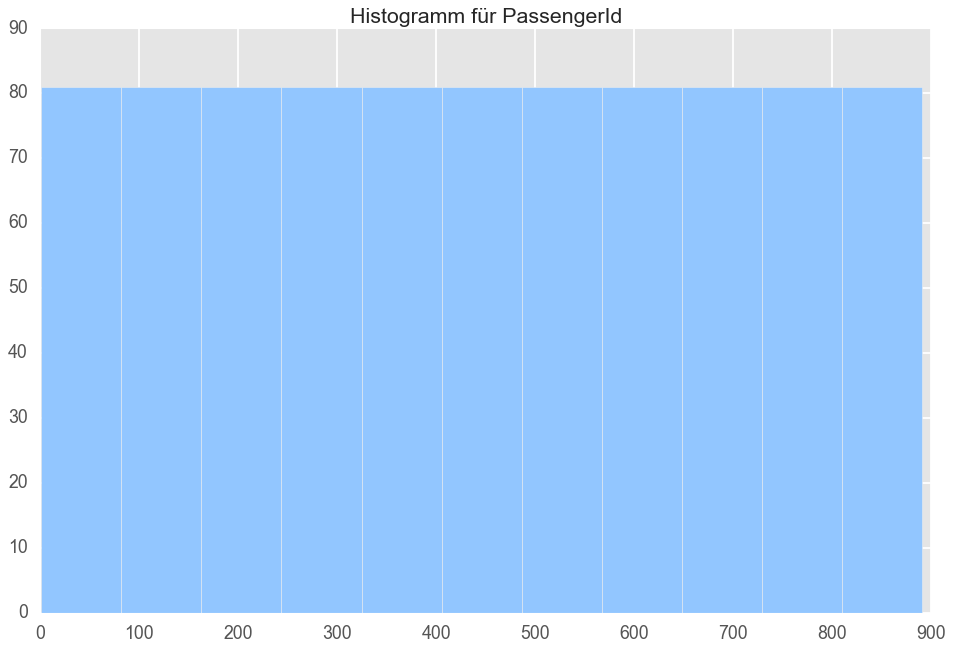

Wertezählungen für Survived:
Survived
0    549
1    342
Name: count, dtype: int64




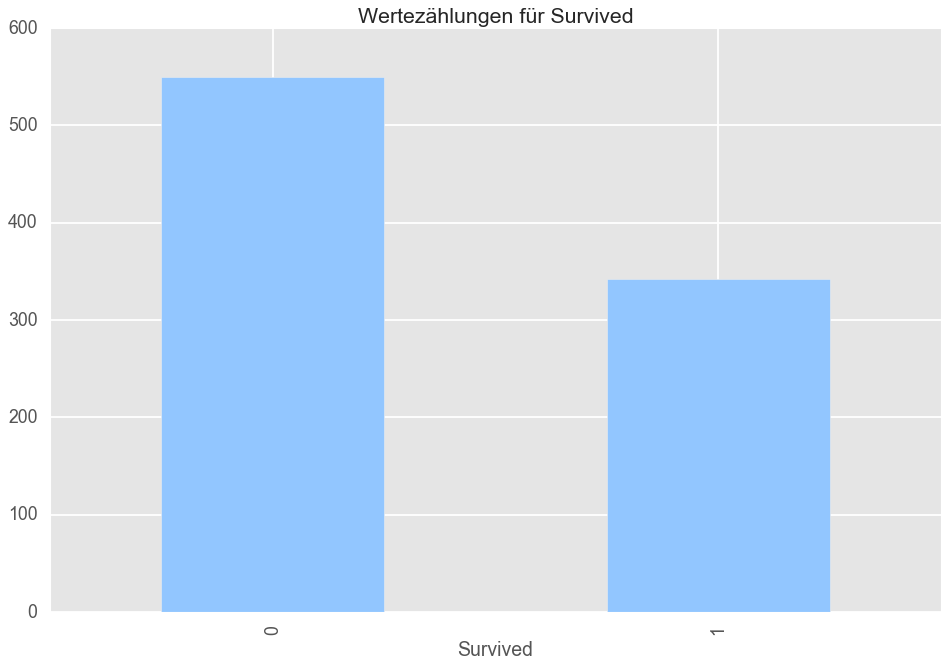

Wertezählungen für Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64




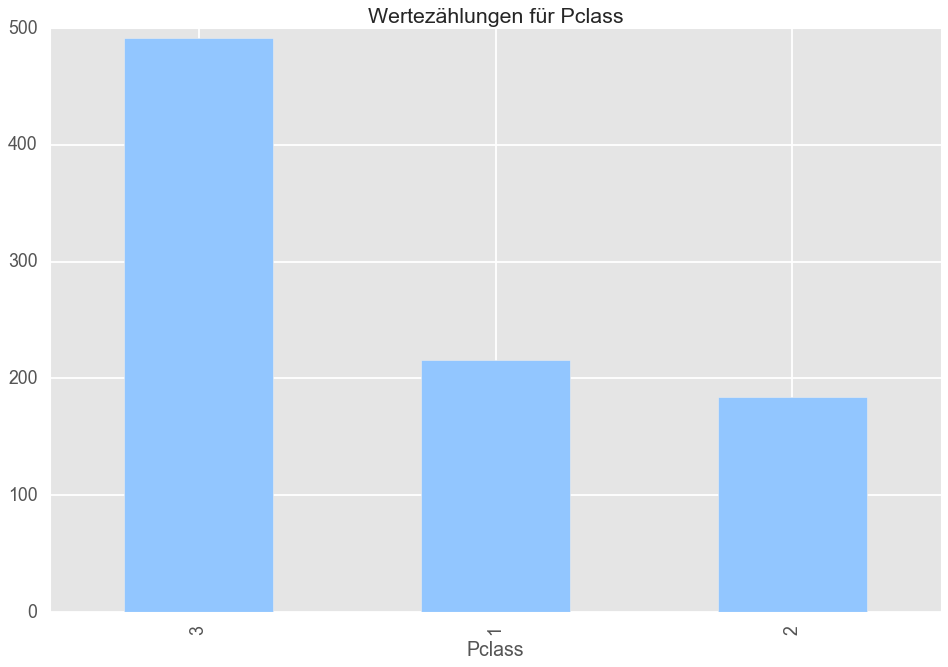

Wertezählungen für Name:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64




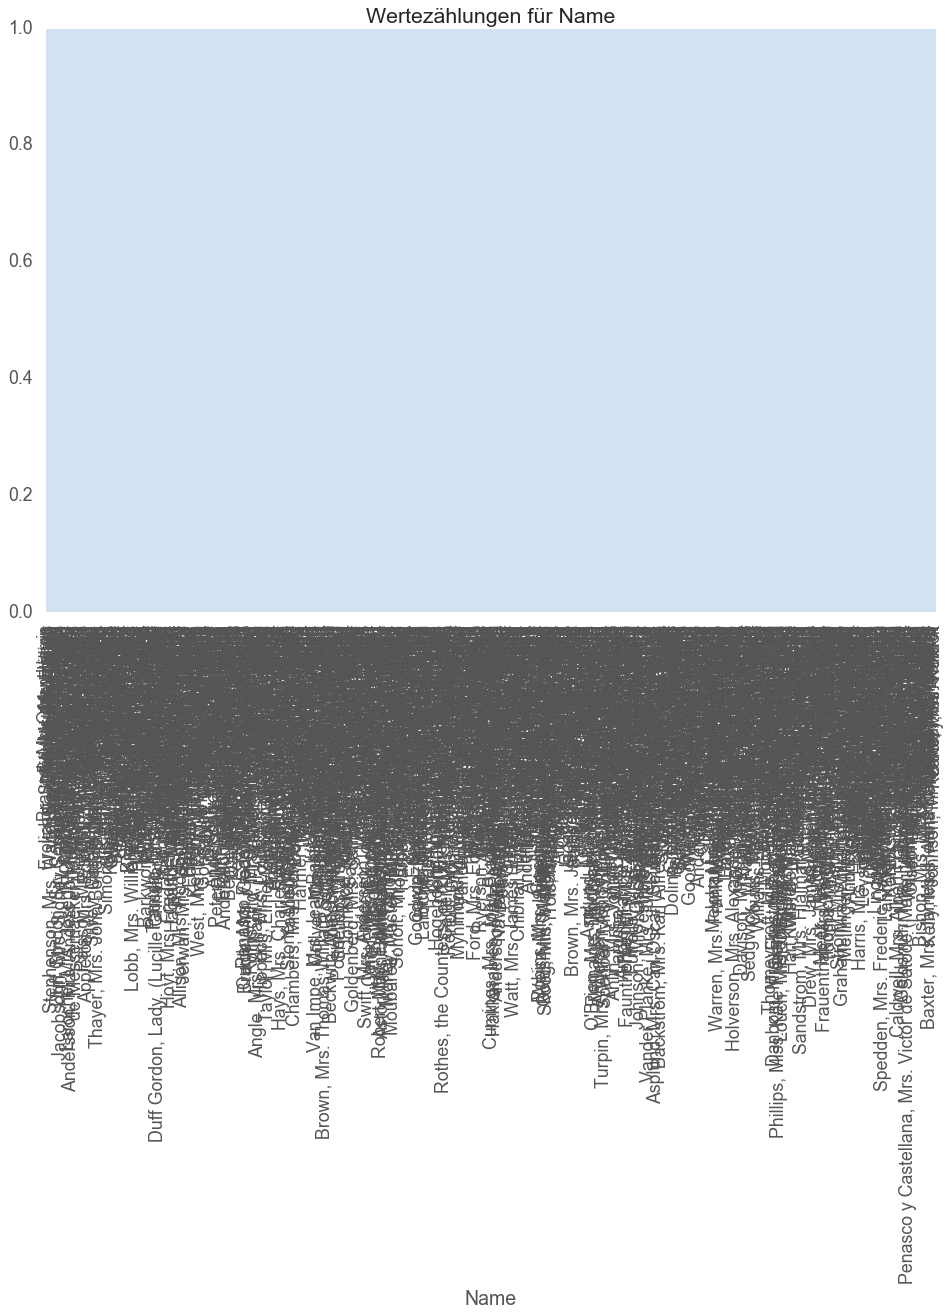

Wertezählungen für Sex:
Sex
male      577
female    314
Name: count, dtype: int64




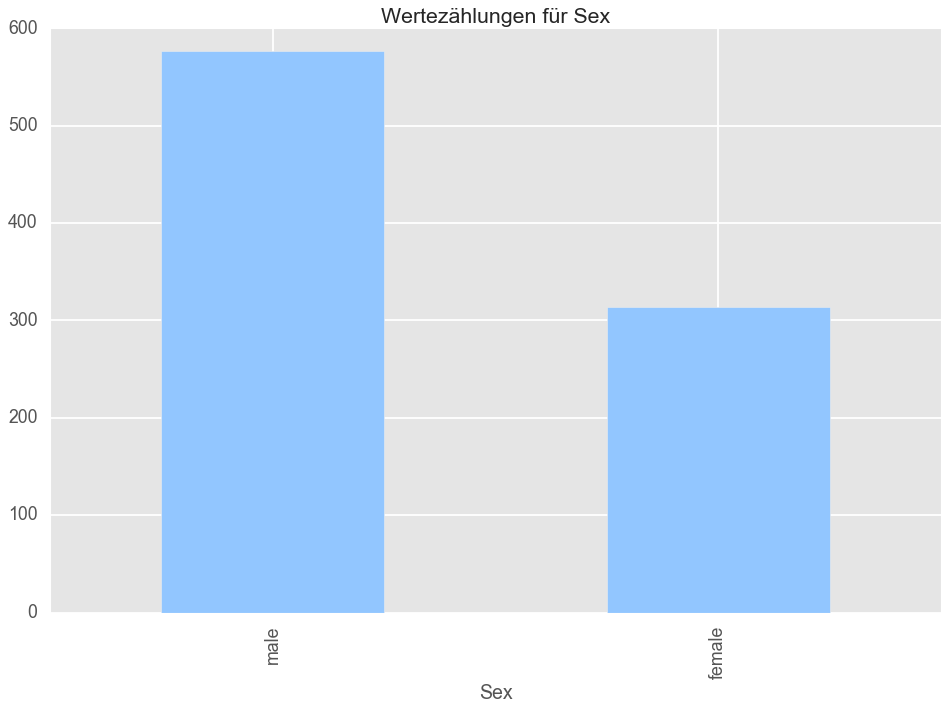

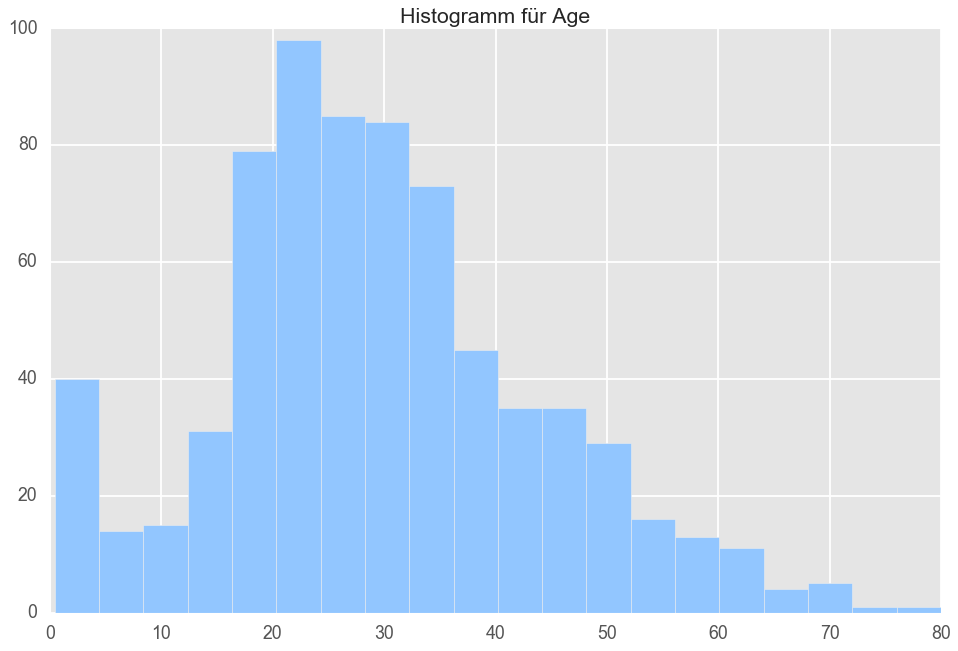

Wertezählungen für Ticket:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64




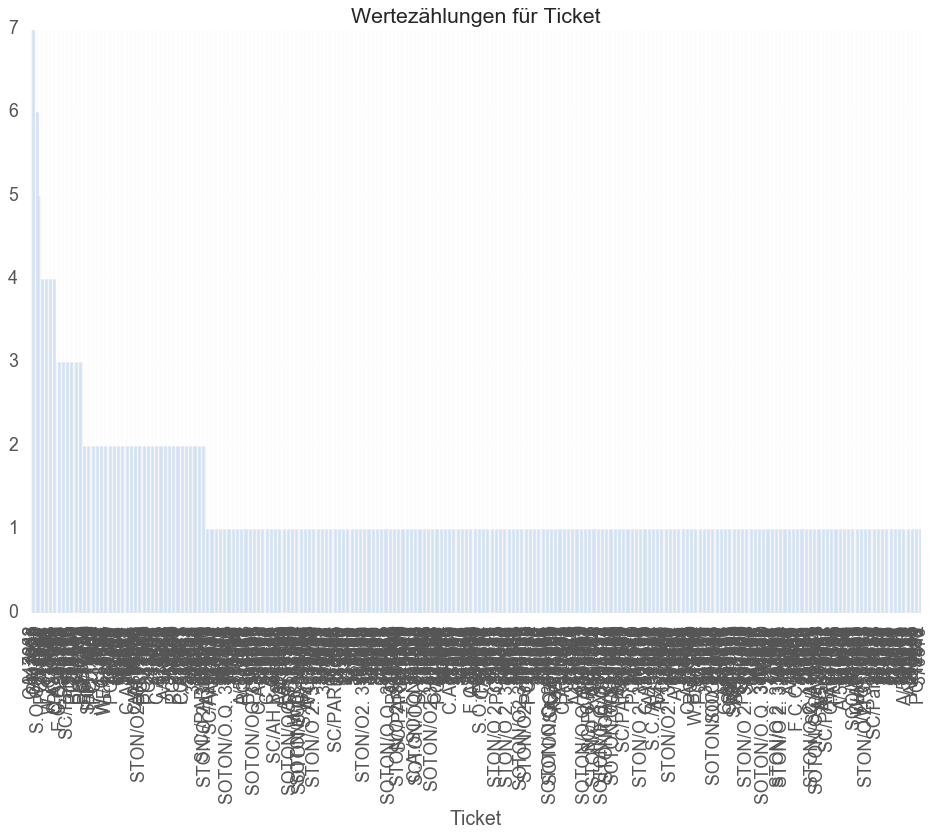

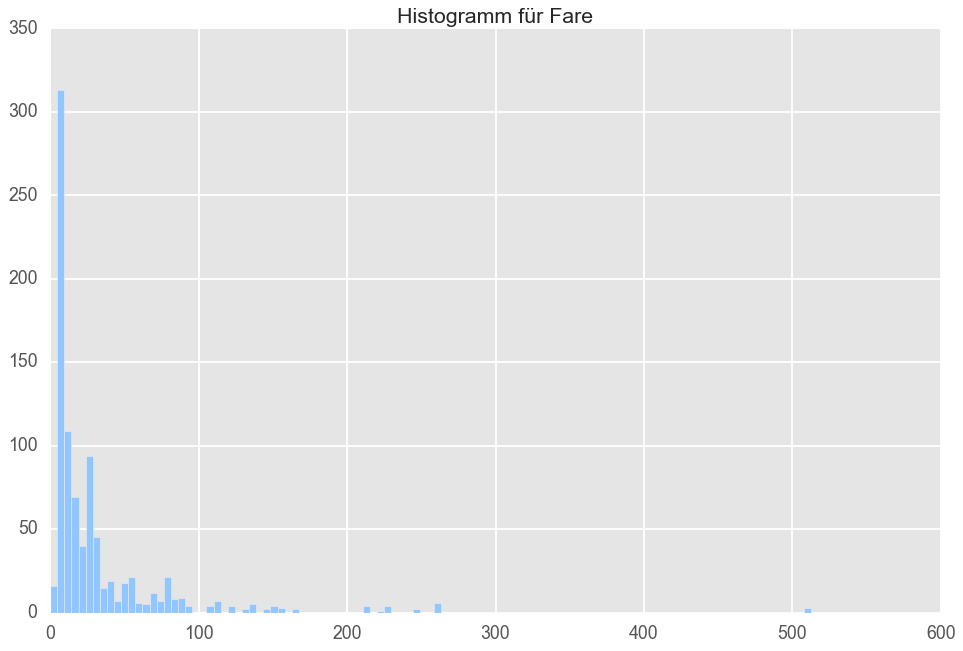

Wertezählungen für Cabin:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64




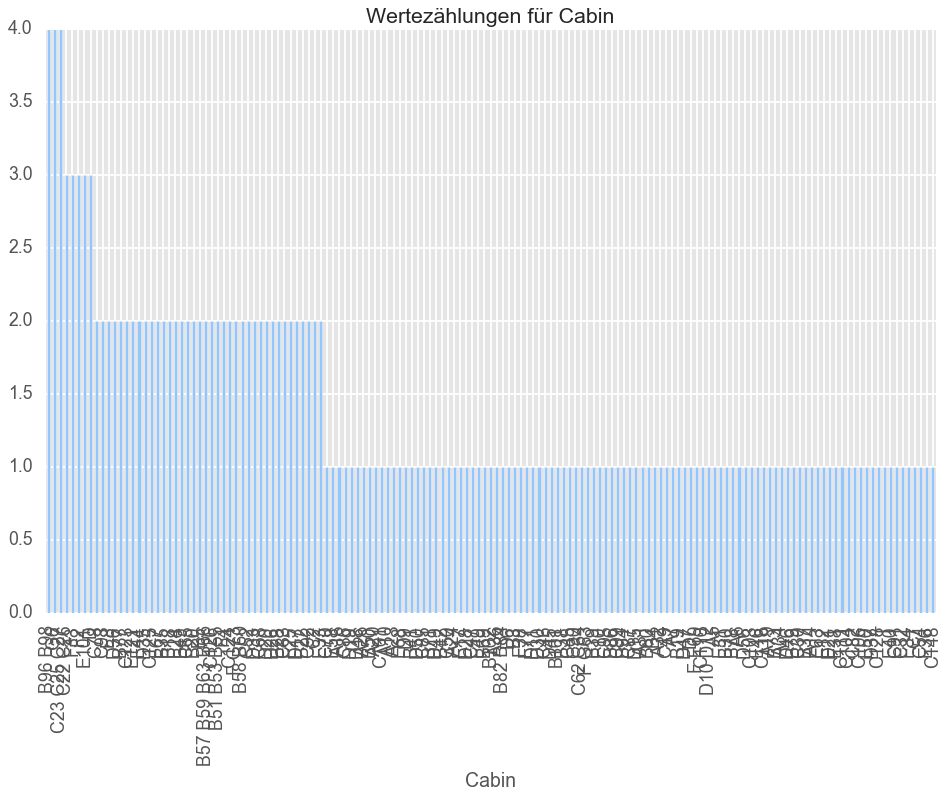

Wertezählungen für Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64




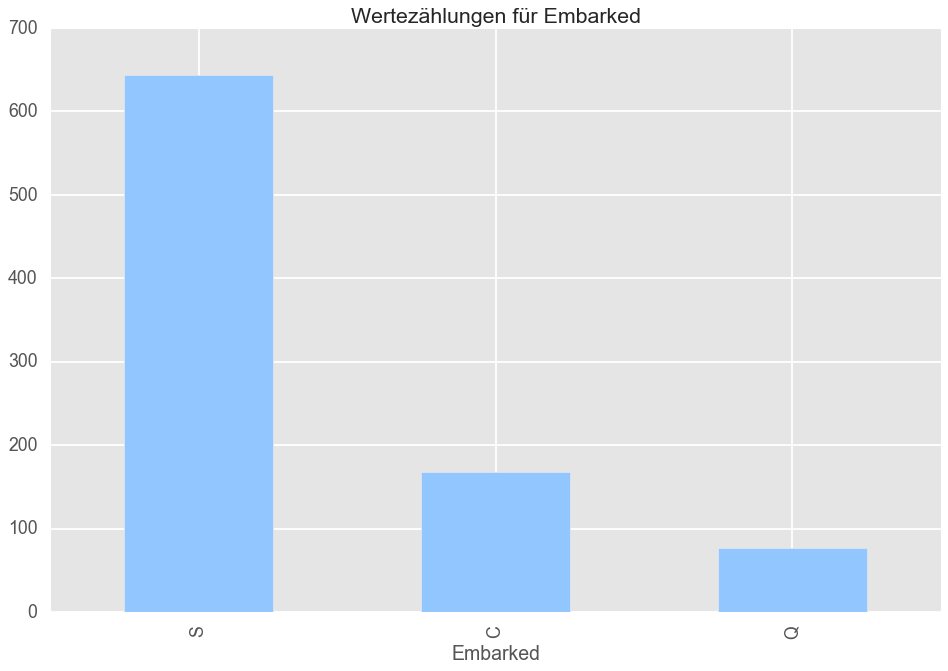

Deskriptive Statistiken:
       PassengerId    Survived      Pclass         Age        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118   32.204208
std     257.353842    0.486592    0.836071   14.526497   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    7.910400
50%     446.000000    0.000000    3.000000   28.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000  512.329200




In [149]:
def explore_dataframe(df):
    # Setze Anzeigeoptionen
    pd.set_option('display.max_rows', 10)
    
    # Zeige den DataFrame
    display(df)
    
    # Datentypen anzeigen
    print("Datentypen:")
    print(df.dtypes)
    print("\n")
    
    # Fehlende Werte pro Spalte
    print("Fehlende Werte pro Spalte:")
    print(df.isna().sum())
    print("\n")
    
    # Wertezählungen für kategorische Daten und Histogramme für numerische Daten
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            print(f"Wertezählungen für {col}:")
            print(df[col].value_counts())
            print("\n")
            df[col].value_counts().plot(kind="bar")
            plt.title(f"Wertezählungen für {col}")
            plt.show()
        else:
            df[col].hist(bins='auto')
            plt.title(f"Histogramm für {col}")
            plt.show()
    
    # Deskriptive Statistiken anzeigen
    print("Deskriptive Statistiken:")
    print(df.describe())
    print("\n")


    
explore_dataframe(titanic_raw)
